This short tutorial will demonstrate some of the capabilities of ChiantiPy and the CHIANTI database. It assumes that you know what the CHIANTI database provides and why you want to use it. The current implementation uses Version 0.6 of ChiantiPy and version 8.0 of the CHIANTI database and mainly provides access to methods concerned with single ions. An ion such as Fe XIV is specified by the string ‘fe_14’, in the usual CHIANTI notation.

Bring up a Python session (using > Python -i ), or better yet, an IPython session

In my Ipython 00-setup.py file I have already performed

In [1]:
import chianti
import chianti.core as ch
import numpy as np
import matplotlib.pylab as pl
%matplotlib inline

 using cli
 using CLI for selections


the following import is also useful for this demo

In [2]:
import chianti.filters as chfilters

In [3]:
import os
os.environ['XUVTOP']

'/Users/willbarnes/Documents/Rice/Research/ssw/packages/chianti/dbase'

In [4]:
chianti.Version

'0.6.4'

In [5]:
from IPython import version_info
print(' IPython version %i %i %i '%(version_info[0], version_info[1], version_info[2]))

 IPython version 4 1 2 


What we will really be interested in are various properties of the Fe XIV emissivities as a function of temperature and density. So, let’s define a numpy array of temperatures and a value for the electron density

In [6]:
temp = 10.**(5.8 + 0.05*np.arange(21.))
edens = 1.e+9

In ChiantiPy, temperatures are currently given in degrees Kelvin and densities as the number electron density per cubic cm. Then, construct fe14 as would be typically done

In [7]:
fe14 = ch.ion('fe_14', temperature=temp, eDensity=edens, em=1.e+27)

alternately, since **temperature** and **eDensity** are the first keyword arguments
fe14 = ch.ion('fe_14', temp, edens)

# GUI Tests

In [8]:
import chianti.Gui as chgui

Level populations
=================

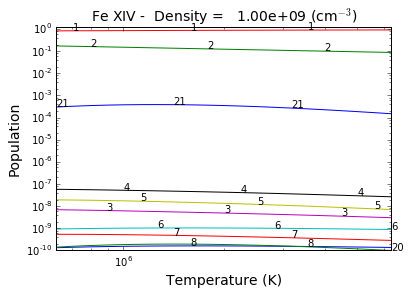

In [10]:
fe14.popPlot()

produces a matplotlib plot window were the population of the top 10 (the default) levels are plotted as a function of temperature.

If the level populations had not already been calculated, popPlot() would have invoked the populate() method which calculates the level populations and stores them in the Population dictionary, with keys = [‘protonDensity’, ‘population’, ‘temperature’, ‘density’].

The populations vs. temperature is not particularly interesting.  Plotting them vs. density is more interesting and will come latere

it is also useful to open a qtconsole to explore the calculations interactively

In [11]:
qtconsole

A ChiantiPy Convention
======================

Classes and function of ChiantiPy start with lower case letters. 
----------------------------------------------------------------

Data attached to the instantiation of a class will start with a capital letter. For example,
--------------------------------------------------------------------------------------------

fe14.populate() creates fe14.Population containing the level population information

fe14.emiss() creates fe14.Emiss containing the line emissivity information

fe14.intensity() creates fe14.Intensity containing the line intensity information that includes the elemental abundance and the ionization equilibrium

fe14.spectrum() creates fe14.Spectrum contain the line and continuum spectrum information

Spectral Line Intensities
=========================

In [12]:
fe14.intensity()
for akey in sorted(fe14.Intensity):
    print('%10s'%(akey))

    avalue
        em
integrated
 intensity
      ionS
      lvl1
      lvl2
       obs
   pretty1
   pretty2
       wvl


the units for line intensities, the key **intensity**, are erg cm$^{-2}$ s$^{-1}$ sr$^{-1}$ / $\int N_H d\ell $, if the emission meassure **em** *not* unspecified.  The emission measure was specified when the ion was created

using index =    10 specifying temperature =   2.00e+06, eDensity =    1.00e+09


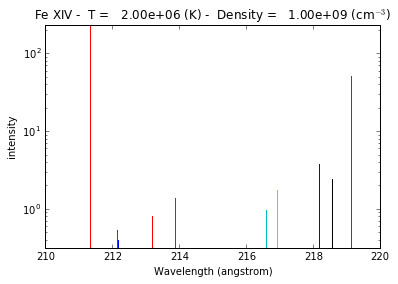

In [13]:
fe14.intensityPlot(wvlRange=[210.,220.],linLog='log')

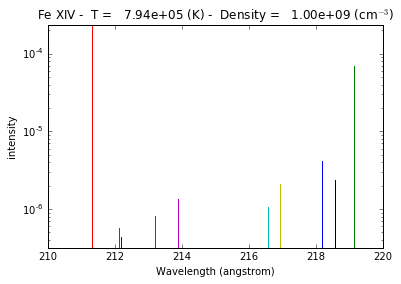

In [14]:
fe14.intensityPlot(index = 2, wvlRange=[210.,220.],linLog='log')

In [15]:
fe14.intensityList(wvlRange=[210.,220.])

using index =    10 specifying temperature =   2.00e+06, eDensity =    1.00e+09 em =   1.00e+27
   
 ------------------------------------------
   
  Ion  lvl1  lvl2                     lower - upper                           Wvl(A)    Intensity      A value Obs
fe_14     1    11              3s2.3p 2P0.5 - 3s2.3d 2D1.5                  211.3172    2.336e+02     3.81e+10 Y
fe_14     4    27              3s.3p2 4P1.5 - 3s.3p(3P).3d 4P1.5            212.1255    5.355e-01     2.21e+10 Y
fe_14     4    28              3s.3p2 4P1.5 - 3s.3p(3P).3d 4D2.5            212.1682    4.039e-01     1.15e+10 Y
fe_14     3    24              3s.3p2 4P0.5 - 3s.3p(3P).3d 4D0.5            213.1955    8.073e-01     4.26e+10 Y
fe_14     3    23              3s.3p2 4P0.5 - 3s.3p(3P).3d 4D1.5            213.8822    1.393e+00     2.97e+10 Y
fe_14     5    28              3s.3p2 4P2.5 - 3s.3p(3P).3d 4D2.5            216.5786    9.736e-01     2.83e+10 Y
fe_14     5    25              3s.3p2 4P2.5 - 3s.3p(3P).3d 

here, we have used the default value for the keyword argument **top** which specified how many of the most intense lines to list.  Also, **index** can be specified to give a different temperature, and **relative** can be set to 1 give relative emissivities

In [16]:
fe14.intensityList(wvlRange=[210.,220.], relative=1, index=11)

using index =    11 specifying temperature =   2.24e+06, eDensity =    1.00e+09 em =   1.00e+27
   
 ------------------------------------------
   
  Ion  lvl1  lvl2                     lower - upper                           Wvl(A)    Intensity      A value Obs
fe_14     1    11              3s2.3p 2P0.5 - 3s2.3d 2D1.5                  211.3172    1.000e+00     3.81e+10 Y
fe_14     4    27              3s.3p2 4P1.5 - 3s.3p(3P).3d 4P1.5            212.1255    2.267e-03     2.21e+10 Y
fe_14     4    28              3s.3p2 4P1.5 - 3s.3p(3P).3d 4D2.5            212.1682    1.694e-03     1.15e+10 Y
fe_14     3    24              3s.3p2 4P0.5 - 3s.3p(3P).3d 4D0.5            213.1955    3.390e-03     4.26e+10 Y
fe_14     3    23              3s.3p2 4P0.5 - 3s.3p(3P).3d 4D1.5            213.8822    5.891e-03     2.97e+10 Y
fe_14     5    28              3s.3p2 4P2.5 - 3s.3p(3P).3d 4D2.5            216.5786    4.083e-03     2.83e+10 Y
fe_14     5    25              3s.3p2 4P2.5 - 3s.3p(3P).3d 

optionally, an output file could also be created by setting the keyword **outFile** to the name of the desired name

Intensity Ratios
================

 ndens =     1 ntemp =    21
 - select the numerator line(s) from these - 
     0 211.3172 
     1 213.8822 
     2 216.9173 
     3 218.1767 
     4 218.5725 
     5 219.1305 
     6 220.0849 
     7 221.1097 
     8 223.2321 
     9 224.355 
 type the comma-separated index/indices of your selection
>>> 0
 - select the denominator line(s) from these - 
     0 211.3172 
     1 213.8822 
     2 216.9173 
     3 218.1767 
     4 218.5725 
     5 219.1305 
     6 220.0849 
     7 221.1097 
     8 223.2321 
     9 224.355 
 type the comma-separated index/indices of your selection
>>> 2


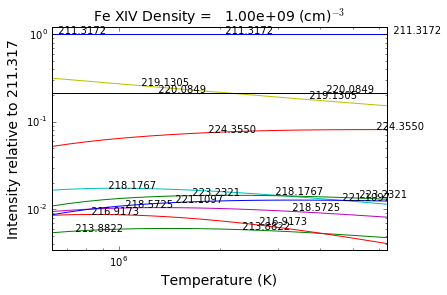

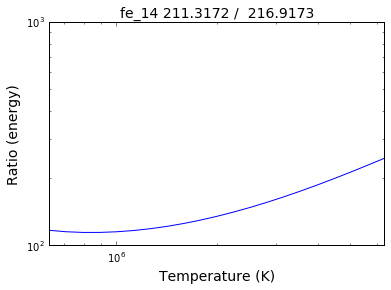

In [17]:
fe14.intensityRatio(wvlRange=[210., 225.])

this brings up a plot showing the relative emissivities on the top 10 Fe XIV lines
followed by a dialog where you can selector the numerator(s) and denominator(s) of the desired intensity ratio
so the specified ratio is then plotted
the intensityRatio as a function of temperature and density can be save to a text file with the following

In [ ]:
fe14.intensityRatioSave()

In [ ]:
fe14.intensityRatioSave(outFile='myratio.txt')

or, eventually we will have to use unicode 

In [ ]:
fe14.intensityRatioSave(outFile=u'myratio2.txt')

**The role of the electron density in line intensities**

In [ ]:
del fe14
temp = 2.e+6
dens = 10.**(6. + 0.1*np.arange(61))
fe14 = ch.ion('fe_14', temp, dens)
fe14.popPlot()

a plot of the population of the top 10 levels is produced as a function of the electron density

In [ ]:
fe14.intensityRatio(wvlRange=[210.,220.])

to obtain ratios of lines widely separated in wavelength, the **wvlRanges** keyword can be used

In [ ]:
temp = 10.**(5.8 + 0.05*np.arange(21.))
edens = 1.e+9
fe12 = ch.ion('fe_12', temperature=temp, eDensity=edens)
fe12.intensityRatio(wvlRanges=[[190.,200.],[1240.,1250.]])

the most recently calculated intensity ratio is stored in fe14.IntensityRatio, with the following keys:

In [ ]:
for akey in sorted(fe14.IntensityRatio):
    print('%10s'%(akey))

G(n,T) function or G(T)
=======================

When G(n,T), for specific spectral line, is multiplied by the line of sight **emission measure**, $\int$ n$_e$ n_$H$ d $\ell$, it provides the predicted value of the line intensity in units of erg cm$^{-2}$ s$^{-1}$ sr$^{-1}$, if the value for **flux** in the** Defaults** is set to **energy** (the default value).  If **flux** is set to photon, the intensity is given in units of


photons cm$^{-2}$ s$^{-1}$ sr$^{-1}$.

A **chiantirc** file is included with the ChiantiPy distribution. If it is placed in $HOME/.chianti it will be read when ChiantiPy is initiated.  Editing this file allows you to specify the values of **flux** that you want and other things such as the set of elemental abundances and the ionization equilibrium.

In [ ]:
del fe14
temp = 10.**(5.8 + 0.05*np.arange(21.))
dens = 1.e+9
fe14 = ch.ion('fe_14', temp, dens)

In [ ]:
fe14.gofnt(wvlRange=[210., 220.],top=5)

this brings up a plot of relative line ratios vs temperature and a single selection widget, similar to the intensityRatio process.  Multiple lines can be selected with the *control* key and their G(T) functions will summed.

The **g(n,T)** calculation is stored in the **Gofnt** dictionary, with keys

In [ ]:
sorted(fe14.Gofnt.keys())

In [ ]:
fe14.Gofnt['wvl']
print(fe14.Gofnt['gofnt'])

while the is a fairly straightforward way to get a G(T) function, it is not very practical to use for a more than a handful of lines.  For the fe_14 line at 211.3172 is in a list of lines to be analyzed, a more practical way is the following

In [ ]:
fe14.intensity()
dist = np.abs(np.asarray(fe14.Intensity['wvl']) - 211.3172)
idx = np.argmin(dist)
fe14.Intensity['wvl'][idx]


In [ ]:
pl.loglog(temp,fe14.Intensity['intensity'][:,idx])

once the axes are properly scaled, this produces the same values as fe14.Gofnt['gofnt']

Spectrum of a single ion
========================

In [ ]:
del fe14
fe14 = ch.ion('fe_14', temperature = 2.e+6, eDensity = 1.e+9)
wvl = 200. + 0.125*np.arange(801)
fe14.spectrum(wvl, em=1.e+27)
pl.figure()
pl.plot(wvl, fe14.Spectrum['intensity'])

this calculates the spectrum of fe_14 over the specified wavelength range and filter it with the default filter which is a gaussian (filters.gaussianR) with a ‘resolving power’ of 1000 which gives a gaussian width of wvl/1000.  Other filters available in chianti.filters include a boxcar filter and a gaussian filter where the gaussian width can be specified directly

the units of the vertical axis is erg cm$^{-2}$ s$^{-1}$ sr$^{-1}$ $\mathring A$$^{-1}$ since the value of the emission measure **em** has been specified

In [ ]:
if hasattr(fe14,'Em'):
    print(' Emission Measure = %12.2e'%(fe14.Em))
else:
    print(' the value for the emission measure is unspecified')

In [ ]:
fe14.spectrum(wvl,filter=(chfilters.gaussian,.4))
pl.figure()
pl.plot(wvl, fe14.Spectrum['intensity'])

calculates the spectrum of fe_14 for a gaussian filter with a width of 0.4 Angstroms.  The current value of the spectrum is kept in fe14.Spectrum with the following keys:

In [ ]:
for akey in sorted(fe14.Spectrum.keys()):
    print(' %10s'%(akey))

In [ ]:
if hasattr(fe14,'Em'):
    print(' Emission Measure = %12.2e'%(fe14.Em))
else:
    print(' the value for the emission measure is unspecified')

Here, the previously value of the emission measure has been used

In [ ]:
fe14.spectrumPlot()

In [ ]:
pl.xlabel(fe14.Spectrum['xlabel'])
pl.ylabel(fe14.Spectrum['ylabel'])

the labels obviously need correction

In ChiantiPy 0.6, the **label** keyword has been added to the ion.spectrum method, and also to the other various spectral classes.  This allows several spectral calculations for different filters to be saved and compared

In [ ]:
del fe14
temp = 10.**(5.8 + 0.1*np.arange(11.))
dens = 1.e+9
fe14 = ch.ion('fe_14', temp, dens)

In [ ]:
emeas = np.ones(11,'float64')*1.e+27
wvl = 200. + 0.125*np.arange(801)
fe14.spectrum(wvl,filter=(chfilters.gaussian,.4),label='.4',em=emeas)
fe14.spectrum(wvl,filter=(chfilters.gaussian,1.),label='1.')

In [ ]:
for akey in sorted(fe14.Spectrum.keys()):
    print(' %10s'%(akey))

In [ ]:
for akey in sorted(fe14.Spectrum['.4'].keys()):
    print(' %10s'%(akey))

In [ ]:
pl.figure()
pl.plot(wvl,fe14.Spectrum['.4']['intensity'][5], label = '0.4')
pl.plot(wvl,fe14.Spectrum['1.']['intensity'][5],'-r', label = '1.0')

In [ ]:
pl.legend(loc='upper right')

Free-free and free-bound continuum
==================================

The module continuum provides the ability to calculate the free-free, free-bound continuum spectrum for a large number of individual ions.  The two-photon continuum is produced only by the hydrogen-like and helium-like ions

In [ ]:
temperature = 2.e+7
c = ch.continuum('fe_25', temperature = temperature, em=1.e+27)
wvl = 1. + 0.002*np.arange(4501)
c.freeFree(wvl)
pl.figure()
pl.plot(wvl, c.FreeFree['rate'],label='ff')
c.freeBound(wvl)
pl.plot(wvl, c.FreeBound['rate'],label='fb')
fe25=ch.ion('fe_25',2.e+7,1.e+9,em=1.e+18)
fe25.twoPhoton(wvl)
pl.plot(wvl,fe25.TwoPhoton['rate'],label='2 photon')
pl.legend(loc='upper right')

In the continuum calculations, Fe XXV in this case, is the target ion for the free-free calculation. For the free-bound calculation, specified ion is also the target ion. In this case, the radiative recombination spectrum of Fe XXV recombining to form Fe XXIV is returned.  **Note** this will bring up an error message.  Things are probably OK for the present except with the two-photon calculation

The multi-ion class bunch
=========================

The multi-ion class bunch [new in v0.6] inherits a number of the same methods inherited by the ion class, for example intensityList,*intensityRatio*, and intensityRatioSave. As a short demonstration of its usefulness, Widing and Feldman (1989, ApJ, 344, 1046) used line ratios of Mg VI and Ne VI as diagnostics of elemental abundance variations in the solar atmosphere. For that to be accurate, it is necessary that the lines of the two ions have the same temperature response.

In [ ]:
t = 10.**(5.0+0.1*np.arange(11))
bnch=ch.bunch(t,1.e+9,wvlRange=[300.,500.],ionList=['ne_6','mg_6'],abundanceName='unity')
bnch.intensityRatio(wvlRange=[395.,405.],top=7)

there seems to be a significant temperature dependence to the ratio, even though both are formed near 4.e+5 K.

A new keyword argument **keepIons** has been added in v0.6 to the bunch and the 3 spectrum classes.

In [ ]:
dwvl = 0.01
nwvl = (406.-394.)/dwvl
wvl = 394. + dwvl*np.arange(nwvl+1)

In [ ]:
bnch2=ch.bunch(t, 1.e+9, wvlRange=[wvl.min(),wvl.max()], elementList=['ne','mg'], keepIons=1,em=1.e+27)
bnch2.convolve(wvl,filter=(chfilters.gaussian,5.*dwvl))
pl.figure()
pl.plot(wvl, bnch2.Spectrum['intensity'][6],label='Total')
pl.title('Temperature = %10.2e for t[6]'%(t[6]))

In [ ]:
sorted(bnch2.IonInstances.keys())

In [ ]:
pl.plot(wvl,bnch2.IonInstances['mg_6'].Spectrum['intensity'][6],'r',label='mg_6')

In [ ]:
pl.legend(loc='upper left')

Spectra of multiple ions and continuum
======================================

the spectrum for selection of all of the ions in the CHIANTI database can also be calculated. There are 3 spectral classes.

  1.  spectrum - the single processor implementation that can be used anywhere
  2.  mspectrum - uses the Python multiprocessing class and cannot be used in a IPython qtconsole or notebook
  3.  ipymspectrum [new in v0.6] - uses the IPython parallel class and can be used in a IPython qtconsole or notebook


In [ ]:
temp = [1.e+6, 2.e+6]
dens = 1.e+9
wvl = 200. + 0.05*np.arange(2001)
emeasure = [1.e+27 ,1.e+27]

In [ ]:
s = ch.spectrum(temp, dens, wvl, filter = (chfilters.gaussian,.2), em = emeasure, doContinuum=0, minAbund=1.e-5)
pl.figure()
pl.subplot(311)
pl.plot(wvl, s.Spectrum['integrated'])
pl.title('integrated')
pl.subplot(312)
pl.plot(wvl, s.Spectrum['intensity'][0])
pl.subplot(313)
pl.plot(wvl, s.Spectrum['intensity'][1])

the integrated spectrum is formed by multiplying each spectrum by the value of em (‘as in emission measure’) and summing them. Note that even though a value is specified for em, only the values of s.Spectrum[‘integrated’] have been multiplied by em. Also, the filter is not applied to the continuum. This spectrum was created with CHIANTI database version 8.0 and ChiantiPy version 0.6.0 using the following default values:

setting minAbund = 1.e-6 will include the spectra of 170 ions and take 167 minutes on a 3.5 GHz processor
setting minAbund = 1.e-5 will include the spectra of 100 ions and take 121 s, using a 4 processors, this takes 54s

Calculations with the a spectrum module can be time consuming.  One way to control the length of time the calculations take is to limit the number of ions with the ionList keyword and to avoid the continuum calculations by setting the doContinuum keyword to 0 or False.  Another way to control the length of time the calculations take is with the minAbund keyword.  It sets the minimum elemental abundance that an element can have for its spectra to be calculated.  The default value is set include all elements.  Some usefull values of minAbund are:

*  minAbund = 1.e-4, will include H, He, C, O, Ne
*  minAbund = 2.e-5 adds  N, Mg, Si, S, Fe
*  minAbund = 1.e-6 adds  Na, Al, Ar, Ca, Ni

In [ ]:
for akey in  chianti.data.Defaults:
   print(' %10s - %s'%(akey,chianti.data.Defaults[akey]))

Spectra of multiple ions and continuum with multi-processing
============================================================

The spectrum for a selection of all of the ions in the CHIANTI database can also be calculated. There are 3 spectral classes.

1. spectrum - the single processor implementation that can be used anywhere
2.  mspectrum - uses the Python multiprocessing class and **cannot** be used in a IPython qtconsole or notebook
3.  ipymspectrum [new in v0.6] - uses the IPython parallel class and can be used in a IPython qtconsole or notebook


next, we will use teh ipymspectrum class.  First, it is necessary to start up the cluster.  In some shell
> ipcluster start --profile=notebook  --n=4

this will start 4 engines if you have 4 cores and will use the notebook profile.  Under my .ipython directory, I have 3 profiles defined, 'profile_default', 'profile_notebook', and 'profile_qtconsole.'  You will at least have the default profile.  In that case 

> ipcluster start --n=4

[New in version 0.6] One can also use a different abundance file than the default by specifying the abundanceName keyword. For example, abundanceName = ‘cosmic_1973_allen.abund’. If the specified file is not found in XUVTOP/abundance, then a widget will pop up and one can select the abundance file from a list.

It is also possible to specify a selection of ions by means of the ionList keyword, for example, ionList=[‘fe_11’,’fe_12’,’fe_13’] or with the elementList keyword, for example, elementList=[‘mg’,’si’]

For a minAbund of 1.e-4, 20 ions were calculated in 21 s. If the keyword argument minAbund were set to 1.e-5, then the spectra of 80 ions would be calculated 77 s. This would take about 8 min. on a single processor running at about 3 GHz.

In [ ]:
s2 = ch.ipymspectrum(temp, dens, wvl, filter = (chfilters.gaussian,.2), em = emeasure, doContinuum=0, keepIons=1, elementList=['si'], minAbund=1.e-4)
pl.subplot(211)
pl.plot(wvl,s2.Spectrum['intensity'][0])
pl.ylabel(r'erg cm$^{-2}$ s$^{-1}$ sr$^{-1} \AA^{-1}$')
pl.subplot(212)
pl.plot(wvl,s2.IonInstances['si_9'].Spectrum['intensity'][0])
pl.ylabel(r'erg cm$^{-2}$ s$^{-1}$ sr$^{-1} \AA^{-1}$')
pl.xlabel(r'Wavelength ($\AA$)')
pl.title('Si IX')

Because **keepIons** has been set, the ion instances of all of the ions are maintained in the s2.IonInstances dictionary. It is then possible to compare the spectrum of all of the ions with the spectrum of a single ion.

In [ ]:
print(' number of ions calculated %i '%(len(s3.IonsCalculated)))

In [ ]:
temp = 2.e+7
dens = 1.e+9
wvl = 1. + 0.002*np.arange(4501)
s3 = ch.ipymspectrum(temp, dens, wvl, filter = (chfilters.gaussian,.015), doContinuum=1, em=1.e+27, minAbund=1.e-5)
pl.figure()
pl.plot(wvl, s3.Spectrum['intensity'])

Since the continuum was calculated, it can be plotted separately

In [ ]:
pl.figure()
pl.plot(wvl, s3.FreeFree['intensity'],label='FF')
pl.plot(wvl, s3.FreeBound['intensity'],label = 'FB')
pl.plot(wvl,s3.FreeBound['intensity']+s3.FreeFree['intensity'],label='FF+FB')
pl.legend(loc='upper right')

Radiative Energy Loss Rate
==========================

In [ ]:
with these parameters, the calculation will take 207 s

In [ ]:
temp = 10.**(4.+0.25*np.arange(14))
dens=1.e+4
rl = ch.radLoss(temp, dens, minAbund=1.e-5, abundanceName='sun_photospheric_2011_caffau')
rl.radLossPlot()